# Interaktives Zuschneiden mit napari
Beim Zuschneiden von dreidimensionalen Daten kann es sinnvoll sein, dies interaktiv zu tun, z.B. mit napari. Zur Vereinfachung des Skriptings verwenden wir ein napari-Plugin namens [napari-crop](https://github.com/biapol/napari-crop).

Siehe auch
* [napari Shapes Layer Tutorial](https://napari.org/tutorials/fundamentals/shapes.html)
* [magicgui](https://napari.org/magicgui/)

In [1]:
import napari
from napari.utils import nbscreenshot
from skimage.io import imread
from magicgui import magicgui

# The following is a private function. The interface 
# may be changed in the future. If you copy that code 
# it breaks at some point, please come back to this  
# notebook and check how to update your code.
from napari_crop._function import crop_region

Wir beginnen damit, einen Datensatz zu laden und ihn in napari anzuzeigen.

C:\Users\rober\Anaconda3\envs\bio_39\lib\site-packages\napari\plugins\_plugin_manager.py:494: UserWarning: Plugin 'napari-accelerated-pixel-and-object-classification' provided a non-callable type to `napari_experimental_provide_function`: <class 'magicgui._magicgui.MagicFactory'>. Function widget ignored.
  warn(message=warn_message)


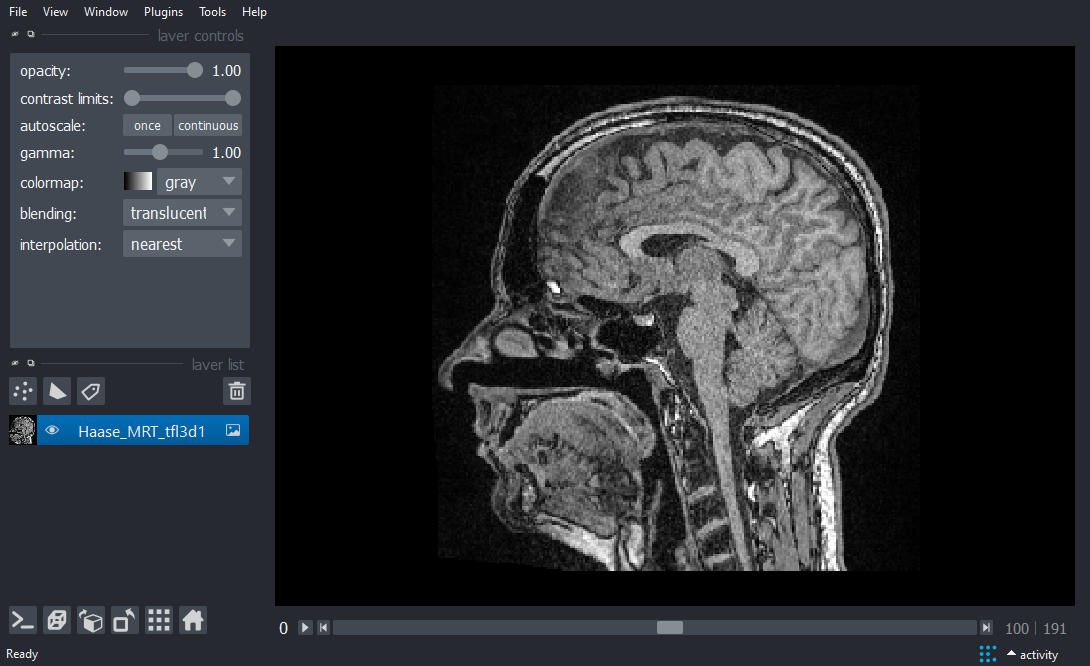

In [2]:
# Start a napari viewer
viewer = napari.Viewer()

# open an image and store it in a layer
image_layer = viewer.open("../../data/Haase_MRT_tfl3d1.tif")

# select a center plane for viewing
viewer.dims.current_step = [100, 0, 0]

# show napari window as screenshot in the notebook
nbscreenshot(viewer)

Als Nächstes fügen wir eine Kreisform in einer neuen Shapes-Ebene zum Viewer hinzu.

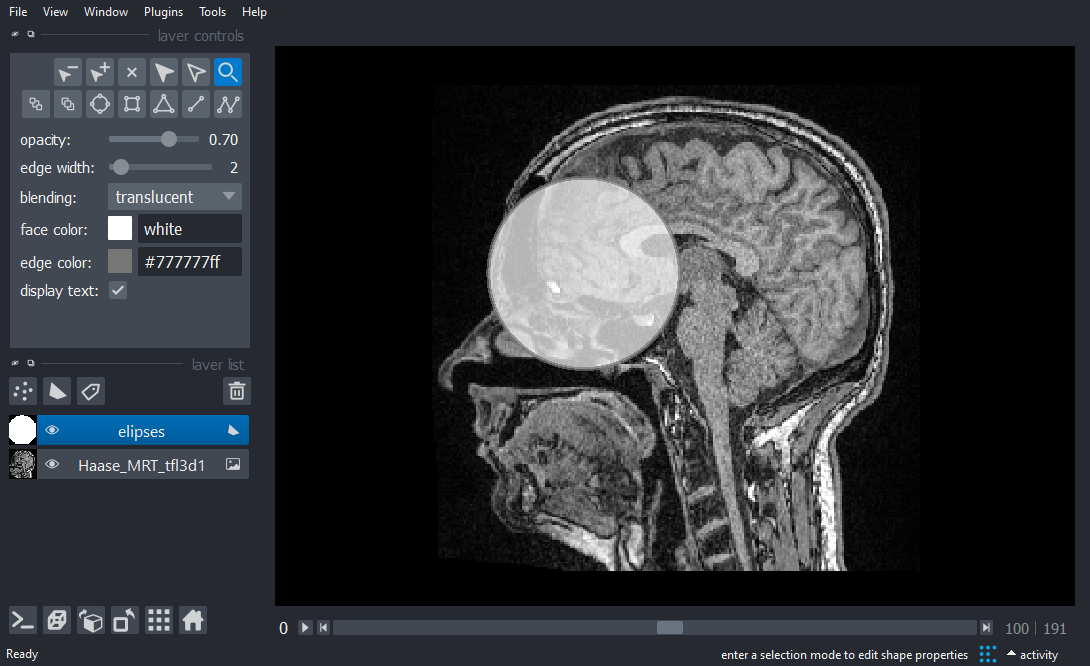

In [3]:
def make_circle(circle_center_x, circle_center_y, circle_radius):
    """Helper function to create circles"""
    current_z_slice = viewer.dims.current_step[0]

    return [[current_z_slice, circle_center_y - circle_radius, circle_center_x - circle_radius],
           [current_z_slice, circle_center_y - circle_radius, circle_center_x + circle_radius],
           [current_z_slice, circle_center_y + circle_radius, circle_center_x - circle_radius],
           [current_z_slice, circle_center_y + circle_radius, circle_center_x + circle_radius]]

elipses = make_circle(80, 100, 50)
    
# add shapes to viewer
shapes_layer = viewer.add_shapes(elipses, shape_type='ellipse', edge_width=2)

nbscreenshot(viewer)

Als Nächstes fügen wir eine grafische Benutzeroberfläche (GUI) zum Zuschneiden eines Bereichs hinzu.

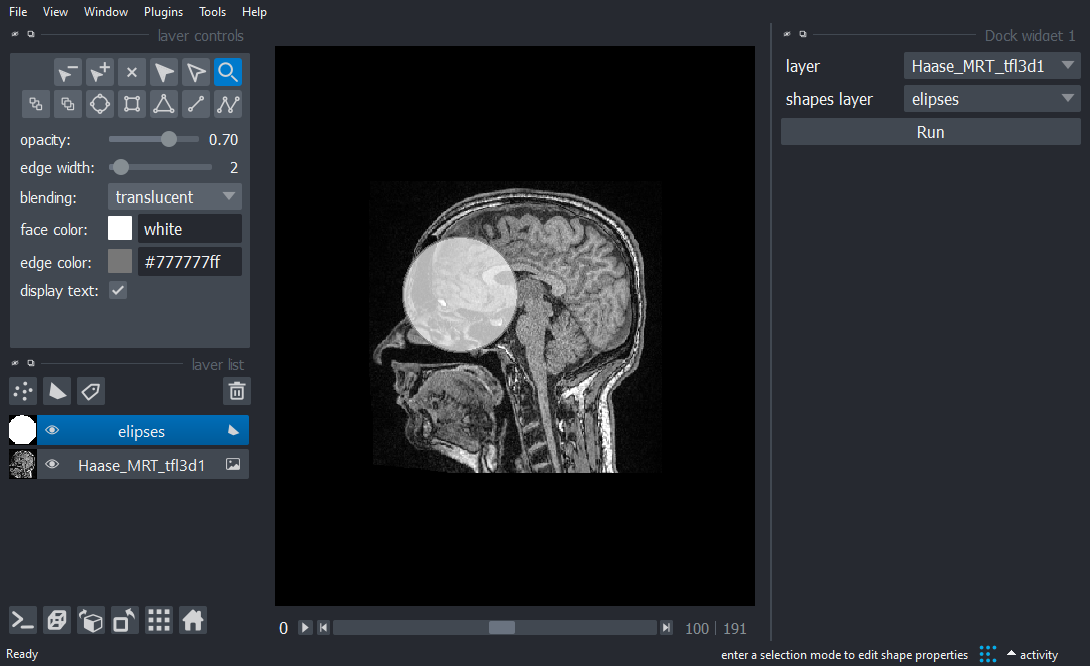

In [4]:
# make a graphical user interface
crop_gui = magicgui(crop_region)

# attach it to the viewer window
viewer.window.add_dock_widget(crop_gui)

nbscreenshot(viewer)

Nach dem Hinzufügen der GUI können wir auch auf den `Run`-Button klicken und einen Bereich wie folgt zuschneiden:

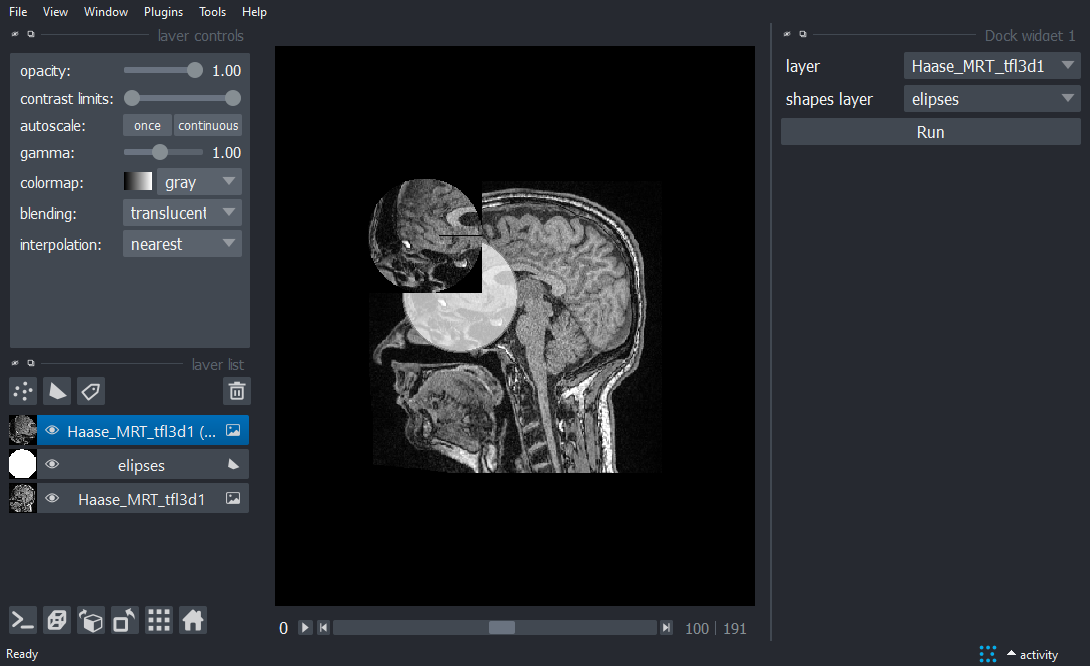

In [5]:
crop_gui()

nbscreenshot(viewer)

Wir können auch den Kreis neu positionieren und erneut zuschneiden.

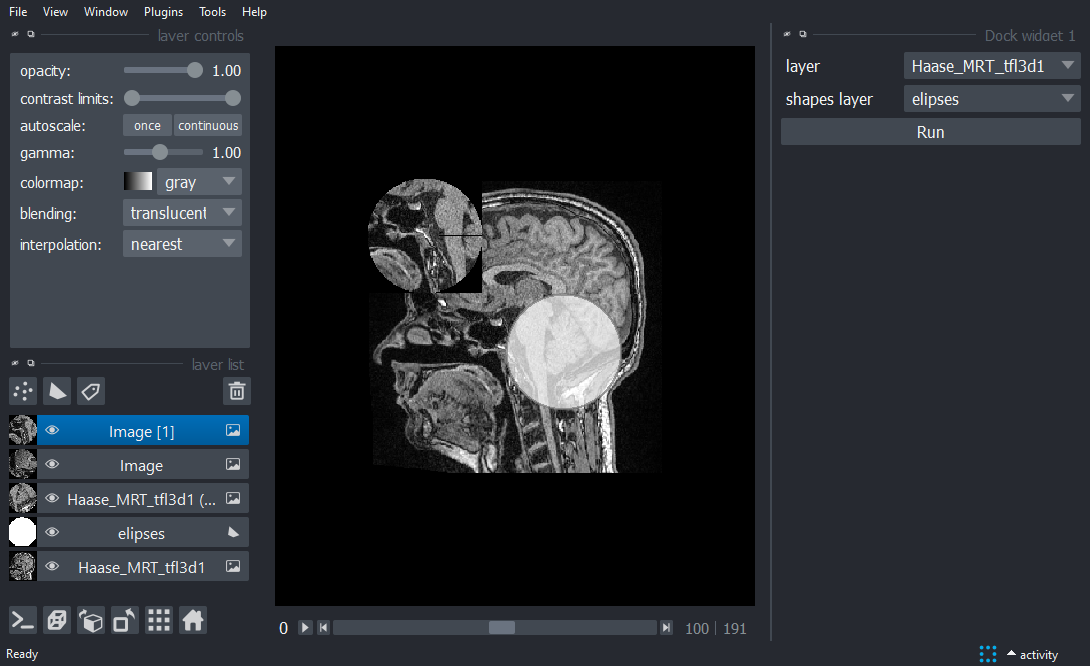

In [6]:
# reposition the selected circle
elipses = make_circle(120, 150, 50)
shapes_layer.data = elipses

# duplicate last cropped layer, because cropping again would overwrite it
viewer.add_image(viewer.layers[2].data)

# crop again
crop_gui()

# crop one more circle
shapes_layer.data = make_circle(170, 150, 50)
viewer.add_image(viewer.layers[2].data)
crop_gui()

nbscreenshot(viewer)

Zum Schluss entfernen wir die Bild- und Shapes-Ebenen und betrachten die Zuschnitte nebeneinander.

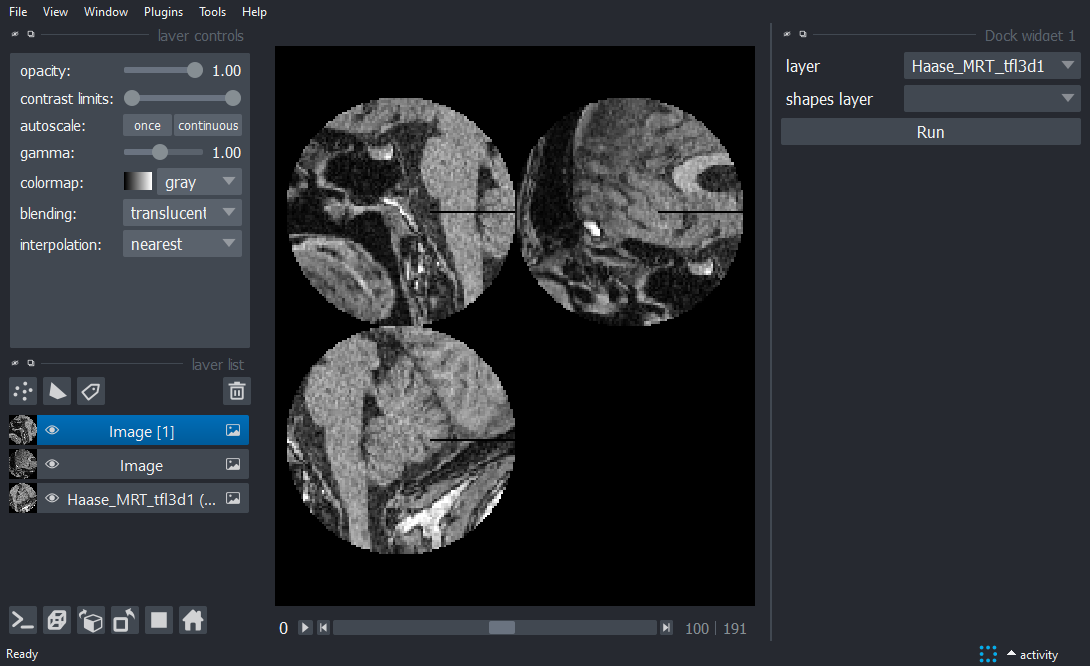

In [7]:
# Remove the first two layers
viewer.layers.remove(viewer.layers[0])
viewer.layers.remove(viewer.layers[0])

# toggle grid view
viewer.grid.enabled = True
viewer.grid.stride = 1

nbscreenshot(viewer)